In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/hourActivity_merged (File 2 for hours).csv")

df.head()

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories
0,1503960366,04-12-2016 00:00,373,20,0.333333,81
1,1503960366,04-12-2016 01:00,160,8,0.133333,61
2,1503960366,04-12-2016 02:00,151,7,0.116667,59
3,1503960366,04-12-2016 03:00,0,0,0.000000,47
4,1503960366,04-12-2016 04:00,0,0,0.000000,48


In [2]:
df.tail()

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories
22094,8877689391,05-12-2016 10:00,514,12,0.200000,126
22095,8877689391,05-12-2016 11:00,1407,29,0.483333,192
22096,8877689391,05-12-2016 12:00,3135,93,1.550000,321
22097,8877689391,05-12-2016 13:00,307,6,0.100000,101
22098,8877689391,05-12-2016 14:00,457,9,0.150000,113


In [3]:
df.shape

(22099, 6)

In [4]:
df.describe()

,Id,StepTotal,TotalIntensity,AverageIntensity,Calories
count,2.209900e+04,22099.000000,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,320.166342,12.035341,0.200589,97.386760
std,2.422500e+09,690.384228,21.133110,0.352219,60.702622
min,1.503960e+09,0.000000,0.000000,0.000000,42.000000
25%,2.320127e+09,0.000000,0.000000,0.000000,63.000000
50%,4.445115e+09,40.000000,3.000000,0.050000,83.000000
75%,6.962181e+09,357.000000,16.000000,0.266667,108.000000
max,8.877689e+09,10554.000000,180.000000,3.000000,948.000000


In [5]:
df.columns

Index(['Id', 'ActivityHour', 'StepTotal', 'TotalIntensity', 'AverageIntensity',
       'Calories'],
      dtype='object')

In [6]:
#changing all the proper camel-case names to lowercase
df.rename({'Id': 'ID', 'ActivityHour': 'activity hour', 'StepTotal': 'step total',
           'TotalIntensity': 'total intensity', 'AverageIntensity': 'average intensity', 'Calories': 'calories'}, axis=1, inplace=True)

df.columns

Index(['ID', 'activity hour', 'step total', 'total intensity',
       'average intensity', 'calories'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 22099 non-null  int64  
 1   activity hour      22099 non-null  object 
 2   step total         22099 non-null  int64  
 3   total intensity    22099 non-null  int64  
 4   average intensity  22099 non-null  float64
 5   calories           22099 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.0+ MB


In [8]:
#convert "activity hour" column to datetime data type
df['activity hour'] = pd.to_datetime(df['activity hour'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 22099 non-null  int64         
 1   activity hour      22099 non-null  datetime64[ns]
 2   step total         22099 non-null  int64         
 3   total intensity    22099 non-null  int64         
 4   average intensity  22099 non-null  float64       
 5   calories           22099 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.0 MB


In [10]:
df.nunique()

ID                     33
activity hour         736
step total           2222
total intensity       175
average intensity     175
calories              442
dtype: int64

In [13]:
df.isnull().sum()

ID                   0
activity hour        0
step total           0
total intensity      0
average intensity    0
calories             0
dtype: int64

**DATA VISUALISATION**

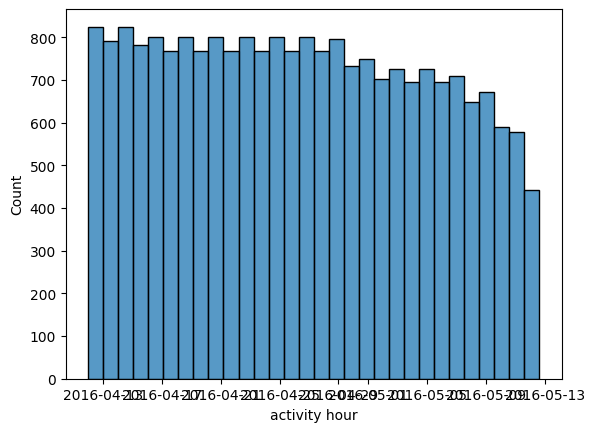

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='activity hour', data=df, )
plt.show()

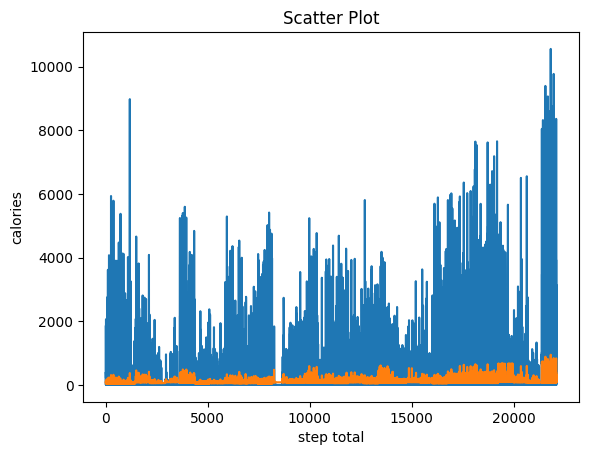

In [15]:
#scatterplot with total distance against very active minutes
plt.plot(df['step total'])
plt.plot(df['calories'])

plt.title("Scatter Plot")

plt.xlabel('step total')
plt.ylabel('calories')

plt.show()

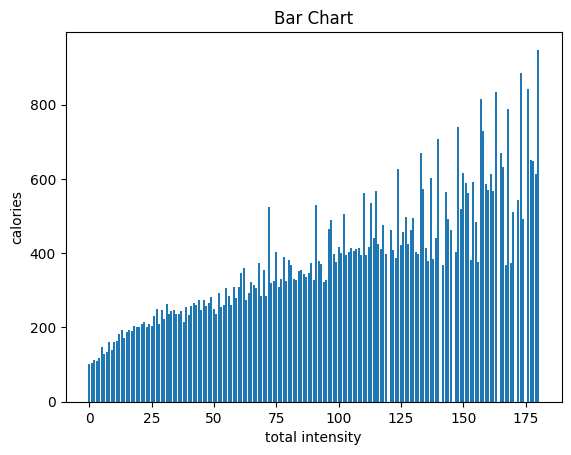

In [17]:
#Q. How many total intensity were burned in activity hour.
#let's show it with the help of a bar chart

plt.bar(df['total intensity'], df['calories'])

plt.title("Bar Chart")

plt.xlabel('total intensity')
plt.ylabel('calories')

plt.show()